In [2]:
import sys 
sys.path.append('codes')
from scipy.optimize import curve_fit
import MyFunctions as mf
import matplotlib.pyplot as plt
import rixs_tools as rt

In [3]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def fun_loren(x, x0, A, res):
    return A * (res/2)**2 / ((x - x0)**2 + (res/2)**2)

def fun_gauss(x, x0, A, res):
    k = res / 2
    sigma = k / (np.sqrt(2) * np.sqrt(np.log(2)))
    return A * np.exp(-(x - x0)**2 / (2 * sigma**2))

def fun_pvoigt(x, x0, A, res, mu):
    return mu * fun_loren(x, x0, A, res) + (1 - mu) * fun_gauss(x, x0, A, res)


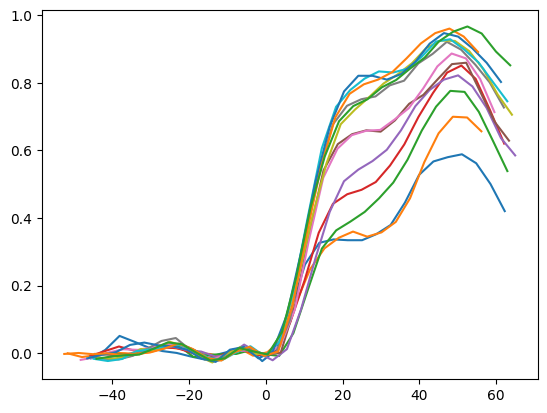

<Figure size 640x480 with 0 Axes>

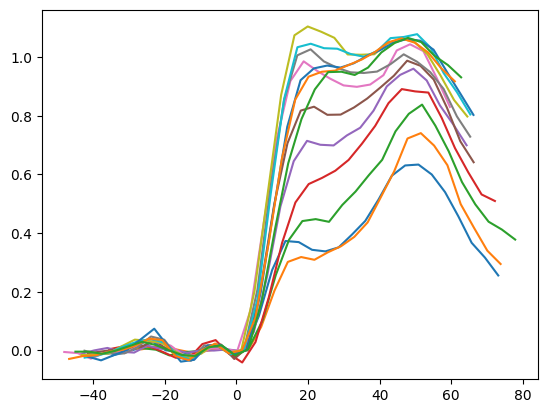

<Figure size 640x480 with 0 Axes>

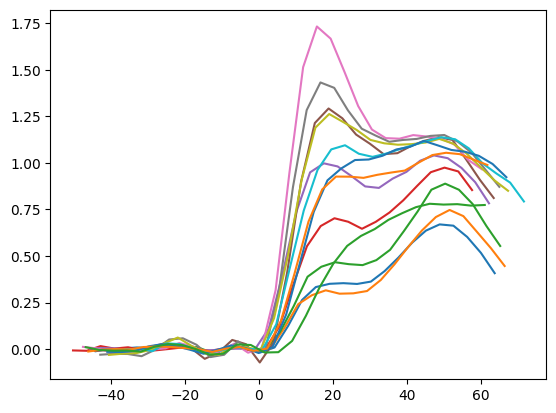

<Figure size 640x480 with 0 Axes>

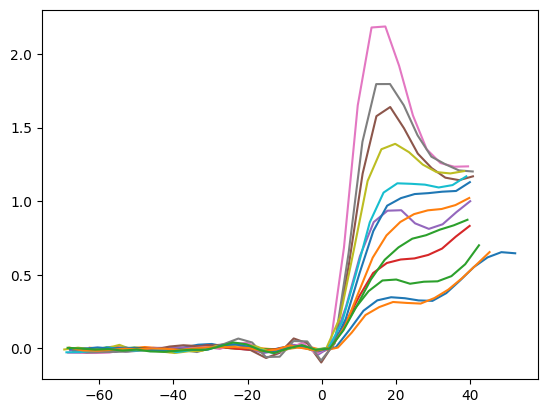

<Figure size 640x480 with 0 Axes>

In [153]:
# First attempt
temperatures_char =  ['T155', 'T104', 'T62', 'T21']
temperatures = np.array([155,104,62,21])*0.086
qs = np.array([0.05, 0.1, 0.15, 0.18, 0.2, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.287])



for i,temperature in enumerate(temperatures_char):
    temperature_char = temperatures_char[i]
    temperature = temperatures[i]
    Ttemp = np.genfromtxt(('simulation_data/'+temperature_char+'.csv'), delimiter=',')  
    Ttemp_sub = np.ones(np.shape(Ttemp))*1000
    plt.figure()
    for j,q in enumerate(qs):
        # subtract the elastic peak
        x_min = -100
        x_max = 5
        x = Ttemp[:,2*j]
        y = Ttemp[:,2*j+1]
        y = y[(x>x_min) & (x<x_max)]
        x = x[(x>x_min) & (x<x_max)]
        # Fit the data with the Voigt profile
        popt, pcov = curve_fit(mf.fv, x, y , p0=[0, 10, 10, 10])
        # Extracting the parameters
        x0, A, fG, fL = popt
        Ttemp_sub[:,2*j] = Ttemp[:,2*j]-popt[0]
        Ttemp_sub[:,2*j+1] = Ttemp[:,2*j+1] - mf.fv(Ttemp[:,2*j], *popt)
        x_plot = np.linspace(-50,100, 100)
        #fig, ax = plt.subplots()
        #ax.plot(x_plot, mf.fv(x_plot, *popt), 'r-', label='fit') 
        #ax.plot(Ttemp[:,2*j], Ttemp[:,2*j+1], '.', label='data')
        #ax.plot(Ttemp[:,2*j], Ttemp[:,2*j+1]-mf.fv(Ttemp[:,2*j], *popt), '.', label='data_sub')
        # add to the plot the fG and fL parameters of the fitting, keep up to 1 digit
        #ax.text(0.05, 0.95, 'fG = '+str(np.round(fG,1))+'\nfL = '+str(np.round(fL,1)), transform=ax.transAxes, fontsize=14, verticalalignment='top')
        #ax.set_ylim([-0.1, 2])
        #ax.set_xlim([-50, 100])
        #ax.legend()
        
        plt.plot(Ttemp_sub[250:280,2*j],Ttemp_sub[250:280,2*j+1])
    # Save the data
    np.savetxt('simulation_data/'+temperature_char+'_sub_with_voigt.csv', Ttemp_sub, delimiter=',')
    # use pcolor to Plot the data for each temperature
    plt.figure()


In [137]:
qs

array([0.05 , 0.1  , 0.15 , 0.18 , 0.2  , 0.22 , 0.23 , 0.24 , 0.25 ,
       0.26 , 0.27 , 0.28 , 0.287])

In [143]:
np.shape(Q)

(30, 13)

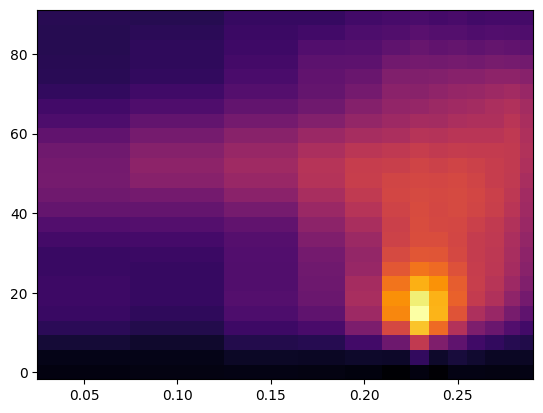

In [156]:
from scipy.interpolate import interp1d
y_interp = Ttemp_sub[100:900,0]
Ttemp_sub_interp = Ttemp_sub[100:900,:]
Z_interp = np.zeros((25,13))
Q,_ = np.meshgrid(qs, y_interp[165:190])

for i in range(13):
    z = Ttemp_sub[0:1000,1+2*i]
    y = Ttemp_sub[0:1000,2*i]
    f = interp1d(y,z)
    z_interp = f(y_interp)
    Z_interp[:,i] = z_interp[165:190]

plt.pcolor(Q, y_interp[165:190], Z_interp, cmap='inferno')


(65, 13)